
Descriptive Statistics for Zero-Coupon Yields:
         Mean  Std Dev      Q1  Median      Q3
0.25y  0.0242   0.0229  0.0019  0.0166  0.0521
0.5y   0.0242   0.0223  0.0017  0.0165  0.0508
1y     0.0239   0.0211  0.0016  0.0170  0.0473
3y     0.0230   0.0175  0.0040  0.0169  0.0412
5y     0.0232   0.0154  0.0082  0.0176  0.0392
10y    0.0253   0.0133  0.0149  0.0194  0.0383
30y    0.0302   0.0109  0.0210  0.0252  0.0403


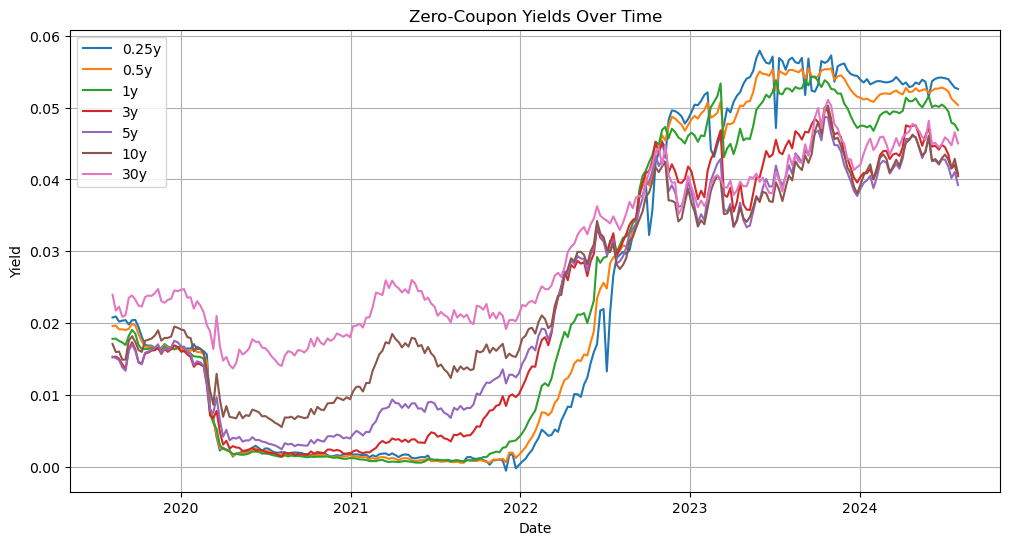

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def nss_yield(beta0, beta1, beta2, beta3, tau1, tau2, maturity):
    """Calculate yield using Nelson-Siegel-Svensson model"""
    try:
        term1 = beta0
        term2 = beta1 * ((1 - np.exp(-maturity/tau1))/(maturity/tau1))
        term3 = beta2 * ((1 - np.exp(-maturity/tau1))/(maturity/tau1) - np.exp(-maturity/tau1))
        term4 = beta3 * ((1 - np.exp(-maturity/tau2))/(maturity/tau2) - np.exp(-maturity/tau2))
        return float(term1 + term2 + term3 + term4)
    except Exception as e:
        print(f"Error in calculation: {str(e)}")
        return np.nan

# Read the Excel file
df = pd.read_excel('TP1 data 60201 W2025.xlsx', 
                   dtype={
                       'BETA0': float, 'BETA1': float, 'BETA2': float,
                       'BETA3': float, 'TAU1': float, 'TAU2': float
                   })

# Convert parameters to numpy arrays for vectorized operations
beta0 = df['BETA0'].to_numpy()/100
beta1 = df['BETA1'].to_numpy()/100
beta2 = df['BETA2'].to_numpy()/100
beta3 = df['BETA3'].to_numpy()/100
tau1 = df['TAU1'].to_numpy()
tau2 = df['TAU2'].to_numpy()

# Define maturities (in years)
maturities = [0.25, 0.5, 1, 3, 5, 10, 30]

# Calculate yields for each maturity using vectorized operations
yields_data = {}
for maturity in maturities:
    yields = np.zeros(len(df))
    for i in range(len(df)):
        yields[i] = nss_yield(
            beta0[i], beta1[i], beta2[i], beta3[i],
            tau1[i], tau2[i], maturity
        )
    yields_data[f'{maturity}y'] = yields

# Create DataFrame with calculated yields
yields_df = pd.DataFrame(yields_data, index=df['Date'])

# Calculate descriptive statistics
stats_df = pd.DataFrame({
    'Mean': yields_df.mean(),
    'Std Dev': yields_df.std(),
    'Q1': yields_df.quantile(0.25),
    'Median': yields_df.quantile(0.50),
    'Q3': yields_df.quantile(0.75)
})

# Format statistics to 4 decimal places
stats_df = stats_df.round(4)

print("\nDescriptive Statistics for Zero-Coupon Yields:")
print("=============================================")
print(stats_df)

# Create visualization
plt.figure(figsize=(12, 6))
for col in yields_df.columns:
    plt.plot(yields_df.index, yields_df[col], label=col)

plt.title('Zero-Coupon Yields Over Time')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
beta0

array([3.28716624e+00, 2.94118766e+00, 3.04416694e+00, 2.78768637e+00,
       2.82226522e+00, 3.18667075e+00, 3.22817081e+00, 3.18139123e+00,
       3.04782544e+00, 3.05828472e+00, 2.26395939e-01, 3.68758269e-02,
       2.33900000e-06, 3.73900000e-06, 7.50000000e-08, 1.67289901e-04,
       1.28000000e-06, 6.74200000e-05, 1.04745982e-03, 5.74651222e-03,
       1.15291212e+00, 2.93869477e+00, 4.07637485e-01, 8.35353251e-01,
       2.84800913e+00, 2.74793196e+00, 2.96884286e+00, 2.84633202e+00,
       2.67548575e+00, 2.57050926e+00, 2.65742959e+00, 3.05221572e+00,
       3.86337940e+00, 4.09128098e+00, 2.40202558e+00, 2.18825659e+00,
       2.01030344e+00, 1.92564187e-03, 2.27950010e+00, 2.63708049e+00,
       2.66659049e+00, 2.58124931e+00, 2.68697798e+00, 2.80075290e+00,
       2.71591703e+00, 2.73240587e+00, 2.70414216e+00, 2.76466063e+00,
       2.68421899e+00, 2.57526705e+00, 2.52015759e+00, 2.48500634e+00,
       2.49581344e+00, 2.55835673e+00, 2.58374269e+00, 2.45664154e+00,
      